In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
df = pd.read_csv('CurrentWater.csv')
# df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'],inplace=True)
df.DateTime = pd.to_datetime(df.DateTime)

reference = pd.read_csv('RiverReferenceTable.csv',delimiter='\t')

In [2]:
Eel = df.loc[df.Name=='EEL R A SCOTIA CA'].sort_values('DateTime')
Eel.head()

,DateTime,Value,Name,VariableDescription
572,2021-12-04 22:37:29.999999744,911.5000,EEL R A SCOTIA CA,Discharge
573,2021-12-05 02:37:29.999999744,905.4375,EEL R A SCOTIA CA,Discharge
574,2021-12-05 06:37:29.999999744,901.6250,EEL R A SCOTIA CA,Discharge
575,2021-12-05 10:37:29.999999744,896.0000,EEL R A SCOTIA CA,Discharge
576,2021-12-05 14:37:29.999999744,892.0000,EEL R A SCOTIA CA,Discharge


In [3]:
Eel = df.loc[df.Name=='EEL R A SCOTIA CA'].sort_values('DateTime')
Eel = Eel.reset_index().drop(columns='index')

maxima = find_peaks(Eel.Value.values)[0]
minima = argrelextrema(Eel.Value.values,np.less)[0]
minima = np.append(minima,Eel.index.max())

def ismaxima(val):
    if val in maxima:
        result = 1
    else: result = 0
    return result

def isminima(val):
    if val in minima:
        result =1 
    else: result = 0
    return result
    
Eel['MaximaFlag'] = Eel.reset_index()['index'].apply(ismaxima)
Eel['MinimaFlag'] = Eel.reset_index()['index'].apply(isminima)

EelMaxima = Eel.loc[Eel.MaximaFlag==1]
EelMinima = Eel.loc[Eel.MinimaFlag==1]

<AxesSubplot:xlabel='DateTime', ylabel='Value'>

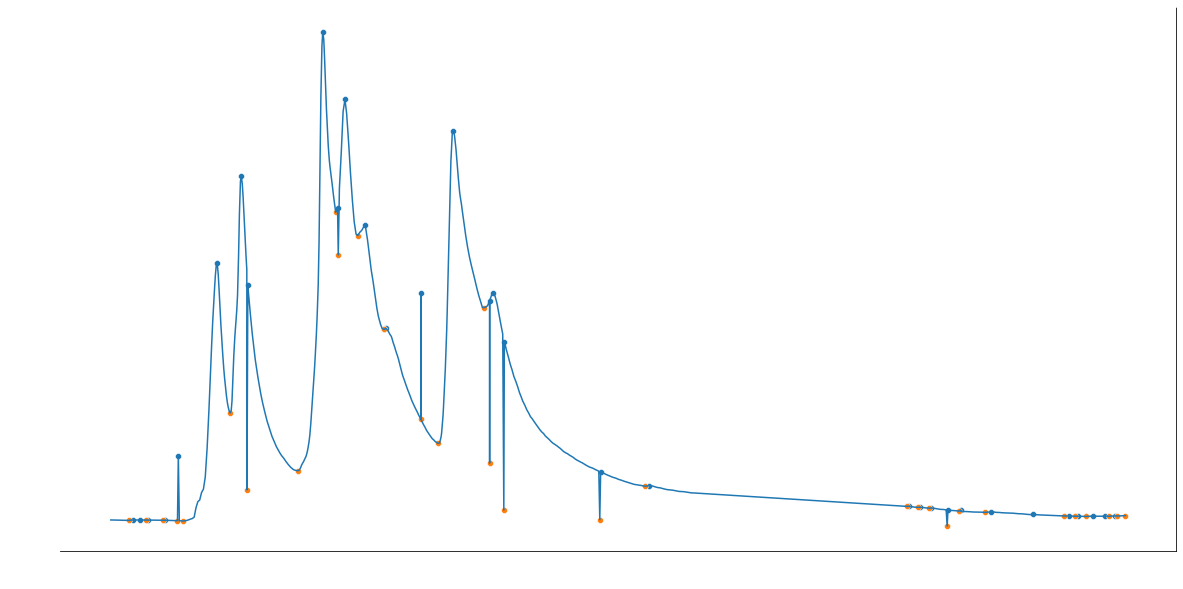

In [4]:
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.label.set_color('white') 
ax.yaxis.label.set_color('white')         

ax.tick_params(axis='x', colors='white')  
ax.tick_params(axis='y', colors='white')  

ax.spines['left'].set_color('white')        
ax.spines['top'].set_color('white')

sns.lineplot(data=Eel,x='DateTime',y='Value')
sns.scatterplot(data=EelMaxima,x='DateTime',y='Value')
sns.scatterplot(data=EelMinima,x='DateTime',y='Value')

In [5]:
MaxEel = Eel.reset_index().loc[(Eel.MaximaFlag==1)&(Eel.DateTime>='2021-12-12')]
MinEel = Eel.reset_index().loc[(Eel.MinimaFlag==1)&(Eel.DateTime>='2021-12-12')]
MaxEel.rename(columns={'index':'timestep'},inplace=True)
MinEel.rename(columns={'index':'timestep'},inplace=True)

def findSlope(i):
    max = MaxEel.iloc[i]
    min = MinEel.iloc[i]
    slope = ((max.Value-min.Value)/(max.timestep-min.timestep))
    return min.timestep,min.Value,int(slope)

slopes = []
for i in np.arange(len(MinEel)):
    s = findSlope(i)
    slopes.append(s)

pd.DataFrame(slopes,columns=['Minima_Timestep','Value','Slope'])

,Minima_Timestep,Value,Slope
0,76,12643.7500,-1175
1,98,4206.2250,-3445
2,180,6311.8750,-252
3,239,34675.0000,-1099
4,242,29993.7500,-5200
5,263,32112.5000,-1149
6,300,21812.5000,-394
7,302,21812.5000,-6
8,361,11987.5000,-174
9,386,9319.3750,-685


In [6]:
Eel.Value.describe()

count      602.000000
mean     16502.121304
std      12026.728824
min        804.500000
25%       7304.062500
50%      13040.625000
75%      24146.875000
max      54462.500000
Name: Value, dtype: float64